In [1]:
'''
1. Step: Before everything else described in this notebook, we created a new SQL scheme in our local MySQL Database called "newcovid"
2. Step: Import required python libraries below
3. Step: Establish a connection to the newly created MySQL DB "newcovid"
'''

'\n1. Step: Before everything else described in this notebook, we created a new SQL scheme in our local MySQL Database called "newcovid"\n2. Step: Import required python libraries below\n3. Step: Establish a connection to the newly created MySQL DB "newcovid"\n'

In [2]:
# establishing a connection to local SPL Database and use secure poassword method "getpass"
#import pymysql
#import getpass
#conn = pymysql.connect(host="localhost",
#                       port=3306,
#                       user="root",
#                       passwd=getpass.getpass(),
#                       db="newcovid")

In [3]:
import pandas as pd
import requests
import json
from flatten_json import flatten 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
''' JSON import from Eurostat API

Definition of the URL-String components accoring to the Eurostat API REST Request requirements
(https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/rest-request)

1) Variable 'Eurostat_base' to use as URL-base 
2) Dictionary 'Eurostat_dict' with values to be called as second URL-component by identyable keys, 
   which will themselves later serve as names for the respective SQL tables
3) Empty list 'df_list', which which as an intermediate container lateron will receive the dataframes, 
   once they are created from the JSON-Files, which we receive from the Eurostat API.

'''

" JSON import from Eurostat API\n\nDefinition of the URL-String components accoring to the Eurostat API REST Request requirements\n(https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/rest-request)\n\n1) Variable 'Eurostat_base' to use as URL-base \n2) Dictionary 'Eurostat_dict' with values to be called as second URL-component by identyable keys, \n   which will themselves later serve as names for the respective SQL tables\n3) Empty list 'df_list', which which as an intermediate container lateron will receive the dataframes, \n   once they are created from the JSON-Files, which we receive from the Eurostat API.\n\n"

In [5]:
Eurostat_base = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"
Eurostat_dict ={"Eurostat_population_density_2018" : 
                "tps00003?unit=PER_KM2&precision=1&time=2018",
                "Eurostat_air_transport_passengers_2018" : 
                "ttr00012?tra_meas=PAS_CRD&precision=1&tra_cov=TOTAL&schedule=TOT&unit=PAS&time=2018",
                "Eurostat_gdp_head_2018" :
                "nama_10_pc?na_item=B1GQ&precision=1&unit=CLV10_EUR_HAB&time=2018",
                "Eurostat_health_euro_expenditure_per_capita_and_totals_2017" :
                "tps00207?precision=1&unit=EUR_HAB&unit=MIO_EUR&unit=PC_GDP&icha11_hc=TOT_HC&time=2017",
                "Eurostat_total_nights_spent_by_residents_non_residents_2018" :
                "tin00175?c_resid=FOR&c_resid=NAT&c_resid=TOTAL&precision=1&unit=NR&time=2018&nace_r2=I551-I553",
                "Eurostat_total_deaths_by_pneumonia_2016" :
                "tps00128?precision=1&sex=F&sex=M&sex=T&unit=RT&time=2016&age=TOTAL&icd10=J12-J18",
                "Eurostat_standardised_death_rate_due_to_chronic_diseases_by_sex" :
                "sdg_03_40?sex=F&sex=M&sex=T&precision=1&time=2016",
                "Eurostat_total_population_on_January1st_2018" :
                "proj_18np?precision=1&age=TOTAL",
                "Eurostat_no_of_practising_physicians_per_100k_inhabitants_2017" :
                "tps00044?precision=1&isco08=OC221&unit=P_HTHAB&wstatus=PRACT&time=2017",
                "Eurostat_share_of_people_with_good_or_very_good_perceived_health_by_sex_above_16_2019" :
                "sdg_03_20?precision=1&sex=F&sex=M&sex=T&unit=PC&quantile=TOTAL&time=2019&age=Y_GE16&levels=VG_G",
                "Eurostat_overcrowding_rate_by_sex_without_single-person_households_2019" :
                "tessi176?precision=1&sex=F&sex=M&sex=T&incgrp=TOTAL&unit=PC&time=2019&age=TOTAL",
                "Eurostat_population_by_age_group_2019" :
                "tps00010?indic_de=PC_Y0_14&indic_de=PC_Y15_24&indic_de=PC_Y25_49&indic_de=PC_Y50_64&indic_de=PC_Y65_79&indic_de=PC_Y80_MAX&precision=1&time=2019"
               }
df_list=[]

In [6]:
''' We now create a function, which 
a) receives a string(URL-base) and a dictionary of strings(secondary URL components),
b) iterates through the dictionary,
c) concatenates the URL components, 
d) reads the JSON files from the API, 
e) transforms it to a panda dataframe,  
f) transforms the respective df into a CSV-file and saves it in the repository
'''

' We now create a function, which \na) receives a string(URL-base) and a dictionary of strings(secondary URL components),\nb) iterates through the dictionary,\nc) concatenates the URL components, \nd) reads the JSON files from the API, \ne) transforms it to a panda dataframe,  \nf) transforms the respective df into a CSV-file and saves it in the repository\n'

In [7]:
def eurostat(base_str,url_dict):
    from pyjstat import pyjstat
    from collections import OrderedDict
    
    for key in url_dict:
        url = base_str + url_dict.get(key)
        dataset = pyjstat.Dataset.read(url)
        df = dataset.write('dataframe')
        df.to_csv(key +'.csv', index=False)
    return

In [8]:
# We will now call the function with the above created string variable and the URL-dictionary 

In [9]:
eurostat(Eurostat_base,Eurostat_dict)

In [10]:
'''
Now we move the freshly created CSV files into a DATA subfolder in our repository. 
As a next step we import the CSV files into the previously created MySQL scheme "newcovid"
There we JOIN the new tables on column with the name of the European countries, 'geo',
and create one new table 'master':

USE newcovid;
CREATE TABLE master
SELECT eurostat_air_transport_passengers_2018.geo AS countries,
       eurostat_gdp_head_2018.value AS gdp_per_head_2018,
       eurostat_air_transport_passengers_2018.value AS air_transport_passengers_2018,
       eurostat_population_density_2018.value AS population_density_2018,
       eurostat_no_of_practising_physicians_per_100k_inhabitants_2017.value AS practPHYSICIANSp100kinh,
       eurostat_health_euro_expenditure_per_capita_and_totals_2017.value AS health_exp_in_€_pH,
       eurostat_total_deaths_by_pneumonia_2016.value AS deaths_pneumo_2016,
       eurostat_standardised_death_rate_due_to_chronic_diseases_by_sex.value AS death_rate_chronic_diseases,
       eurostat_total_nights_spent_by_residents_non_residents_2018.value AS total_nights_spent_hotels_2018,
       eurostat_total_population_on_january1st_2018.value AS total_population_2018
FROM eurostat_air_transport_passengers_2018
JOIN eurostat_gdp_head_2018
    ON eurostat_air_transport_passengers_2018.geo = eurostat_gdp_head_2018.geo
JOIN eurostat_health_euro_expenditure_per_capita_and_totals_2017
    ON eurostat_health_euro_expenditure_per_capita_and_totals_2017.geo = eurostat_air_transport_passengers_2018.geo
    AND eurostat_health_euro_expenditure_per_capita_and_totals_2017.unit = 'Euro per inhabitant'
JOIN eurostat_no_of_practising_physicians_per_100k_inhabitants_2017
    ON eurostat_no_of_practising_physicians_per_100k_inhabitants_2017.geo = eurostat_air_transport_passengers_2018.geo
JOIN eurostat_population_density_2018
    ON eurostat_population_density_2018.geo = eurostat_air_transport_passengers_2018.geo
JOIN eurostat_standardised_death_rate_due_to_chronic_diseases_by_sex
    ON eurostat_standardised_death_rate_due_to_chronic_diseases_by_sex.geo = eurostat_air_transport_passengers_2018.geo
    AND eurostat_standardised_death_rate_due_to_chronic_diseases_by_sex.sex = 'Total'
JOIN eurostat_total_deaths_by_pneumonia_2016
    ON eurostat_total_deaths_by_pneumonia_2016.geo = eurostat_air_transport_passengers_2018.geo
    AND eurostat_total_deaths_by_pneumonia_2016.sex ='Total'
JOIN eurostat_total_nights_spent_by_residents_non_residents_2018
    ON eurostat_total_nights_spent_by_residents_non_residents_2018.geo = eurostat_air_transport_passengers_2018.geo
    AND eurostat_total_nights_spent_by_residents_non_residents_2018.c_resid = 'total'
JOIN eurostat_total_population_on_january1st_2018
    ON eurostat_total_population_on_january1st_2018.geo = eurostat_air_transport_passengers_2018.geo
    AND eurostat_total_population_on_january1st_2018.sex = 'Total'
    AND eurostat_total_population_on_january1st_2018.time = '2018'
    AND eurostat_total_population_on_january1st_2018.projection = 'Baseline projections';

'''

# In the meantime Bita has collected the WHO Covid19 data (confirmed cases, deaths and recovered) for the latest day from the WHO using their API.

''' 

While Bita already starts exploring plotting the WHO data with matlib.plot, 
she also exports the WHO data of April 7th, which we incorporate into our SQL scheme newcovid 
and join with the previously created  table as master_stats:

        CREATE TABLE master_stats
        Select *
        FROM master
        JOIN who7thapril
        ON who7thapril.Country = master.countries;

'''

# As a next step in MySQL, we sort master_stats in descending order for confirmed cases and deaths and scan for potential correlations with the numbers received from Eurostats.

'''
From here we now create tables with either and/or confirmed cases and deaths from WHO ands a small subset of columns from Eurostat like this one:

        CREATE TABLE deaths_conf_gdp_head_2018
        SELECT Country, Confirmed, Deaths, gdp_per_head_2018
        FROM master_stats;

For a better comparison of relative data we needed to also calculate the Covid19 death rate per 100.000 inhabitants 
by multiplying the number of deaths with 100.000 and dividing this by the total number of the population. 

        CREATE TABLE newcovid.deaths_phys_health_exp
        SELECT   deaths_phys_health_exp.Country, deaths_phys_health_exp.Deaths, 
                (master_stats.Deaths*100000)/master_stats.total_population_2018 AS Deaths_p100kinh, 
                deaths_phys_health_exp.practPHYSICIANSp100kinh, deaths_phys_health_exp.health_exp_in_€_pH
        FROM deaths_phys_health_exp
        JOIN master_stats
        ON master_stats.Country = deaths_phys_health_exp.Country;

These new tables we exported as CSV files into the respective DATA folder in our repository.
'''


'\nFrom here we now create tables with either and/or confirmed cases and deaths from WHO ands a small subset of columns from Eurostat like this one:\n\n        CREATE TABLE deaths_conf_gdp_head_2018\n        SELECT Country, Confirmed, Deaths, gdp_per_head_2018\n        FROM master_stats;\n\nFor a better comparison of relative data we needed to also calculate the Covid19 death rate per 100.000 inhabitants \nby multiplying the number of deaths with 100.000 and dividing this by the total number of the population. \n\n        CREATE TABLE newcovid.deaths_phys_health_exp\n        SELECT   deaths_phys_health_exp.Country, deaths_phys_health_exp.Deaths, \n                (master_stats.Deaths*100000)/master_stats.total_population_2018 AS Deaths_p100kinh, \n                deaths_phys_health_exp.practPHYSICIANSp100kinh, deaths_phys_health_exp.health_exp_in_€_pH\n        FROM deaths_phys_health_exp\n        JOIN master_stats\n        ON master_stats.Country = deaths_phys_health_exp.Country;\n\nTh

In [12]:
# As a next step we import these CSV files into panda dataframes, i.e. 
# this one, which visualizes the number of Covid19 deaths and the public health expenditure in Euro per Head for each country
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_deaths_phys_health_exp2.csv')

In [13]:
# In preparation for the ensuing plotting we sort the dataframes in Descending order
df_Eurostat=df_Eurostat.sort_values(by = "practPHYSICIANSp100kinh", axis=0, ascending=False)

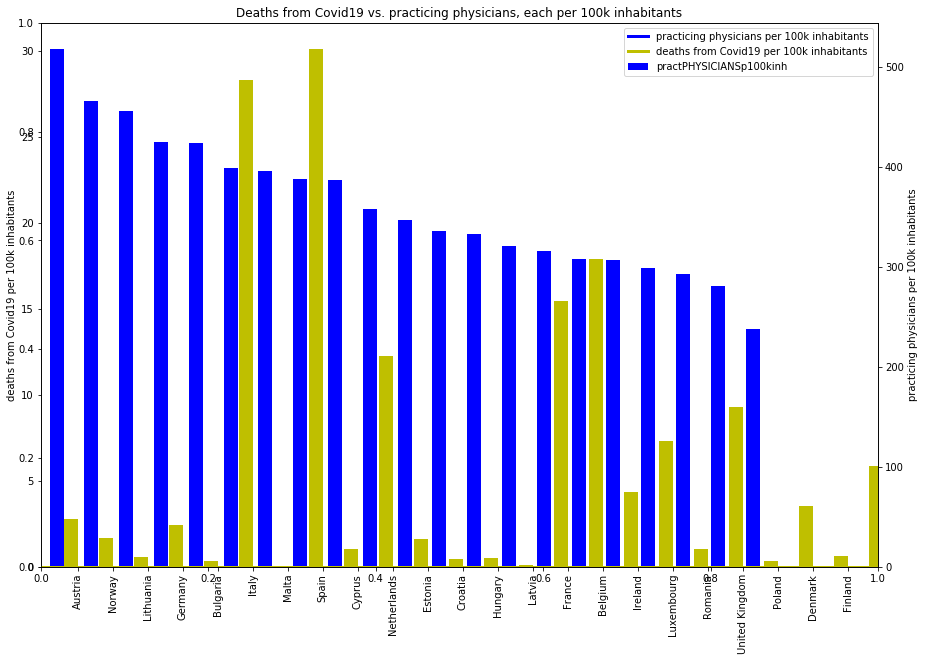

In [14]:
# Now thanks to all the plotting preparation work by Bita we are able to plot the tables

fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
#ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
df_Eurostat.Deaths_p100kinh.plot(kind='bar', color='y', ax=ax, width=width, position=1)
df_Eurostat.practPHYSICIANSp100kinh.plot(kind='bar', color='b', ax=ax2, width=width, position=2)
plt.axhline(label = "practicing physicians per 100k inhabitants", linewidth=3, color = 'b', );
plt.axhline(label = "deaths from Covid19 per 100k inhabitants", linewidth=3, color = 'y', );

#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('deaths from Covid19 per 100k inhabitants')
ax2.set_ylabel('practicing physicians per 100k inhabitants')
#ax.tick_params(labelrotation=90)
ax.set_title("Deaths from Covid19 vs. practicing physicians, each per 100k inhabitants")
ax.set_frame_on(False)
plt.legend(loc="upper right");
# we save a png file to the repository, which we then use for the project presentation
plt.savefig("DeathsvsPhysicians.png") # save as png

In [14]:
# From these graphs we cannot see an indication of correlation between deaths from Covid19 per 100,000 inhabitants and the
# number of practicing physicians per 100.000 inhabitants of the euiropean countries. They seem to be rather unrelated at this point.

In [15]:
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_confirmd_hotel_pass_percountry.csv')
df_Eurostat=df_Eurostat.sort_values(by = "Confirmed", axis=0, ascending=False)

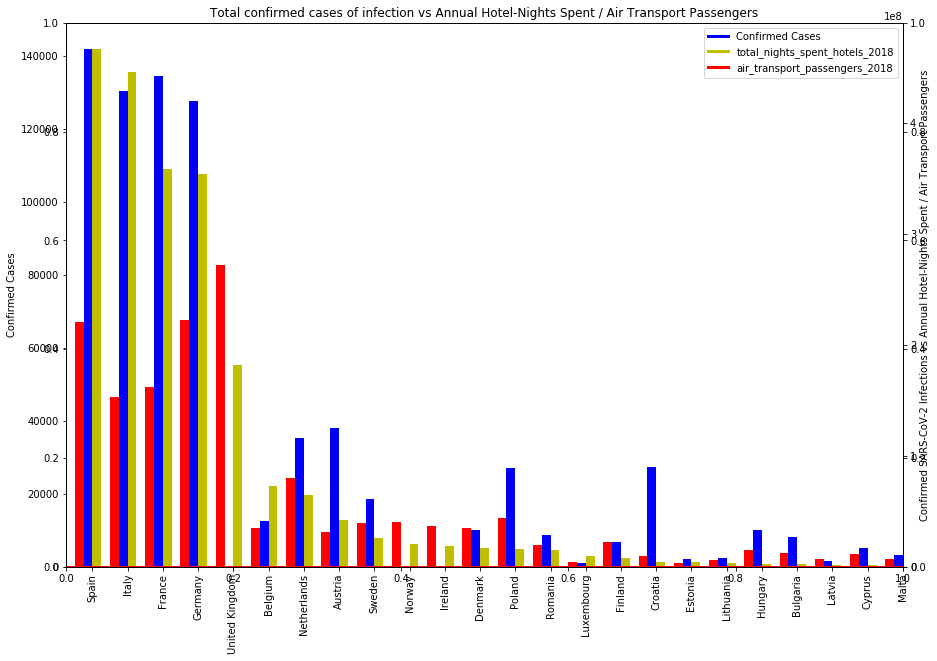

In [16]:
fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.25
df_Eurostat.Confirmed.plot(kind='bar', color='y', ax=ax, width=width, position=0)
df_Eurostat.total_nights_spent_hotels_2018.plot(kind='bar', color='b', ax=ax2, width=width, position=1)
df_Eurostat.air_transport_passengers_2018.plot(kind='bar', color='r', ax=ax2, width=width, position=2)
plt.axhline(label = "Confirmed Cases", linewidth=3, color = 'b', );
plt.axhline(label = "total_nights_spent_hotels_2018", linewidth=3, color = 'y', );
plt.axhline(label = "air_transport_passengers_2018", linewidth=3, color = 'r', );
#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('Confirmed Cases')
ax2.set_ylabel('Confirmed SARS-CoV-2 Infections vs Annual Hotel-Nights Spent / Air Transport Passengers')
#ax.tick_params(labelrotation=90)
ax.set_title('Total confirmed cases of infection vs Annual Hotel-Nights Spent / Air Transport Passengers')
ax.set_frame_on(False)
plt.legend(loc="upper right");
plt.savefig("Confirmed SARS-CoV-2 Infections vs Annual Hotel-Nights Spent-Air Transport Passengers.png") # save as png

In [17]:
# From these graphs we actually do see an indication of correlation between the total number of confirmed SARS-CoV-2 infections and the
# total number of hotel nights spent in a country in the european countries, especially for the countries with highest number of infections. 
# Also the number of air transport passengers in these countries are significantly higher than in the less affected countries.

In [18]:
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_confirm_popdens_percountry.csv')
df_Eurostat=df_Eurostat.sort_values(by = "Confirmed", axis=0, ascending=False)

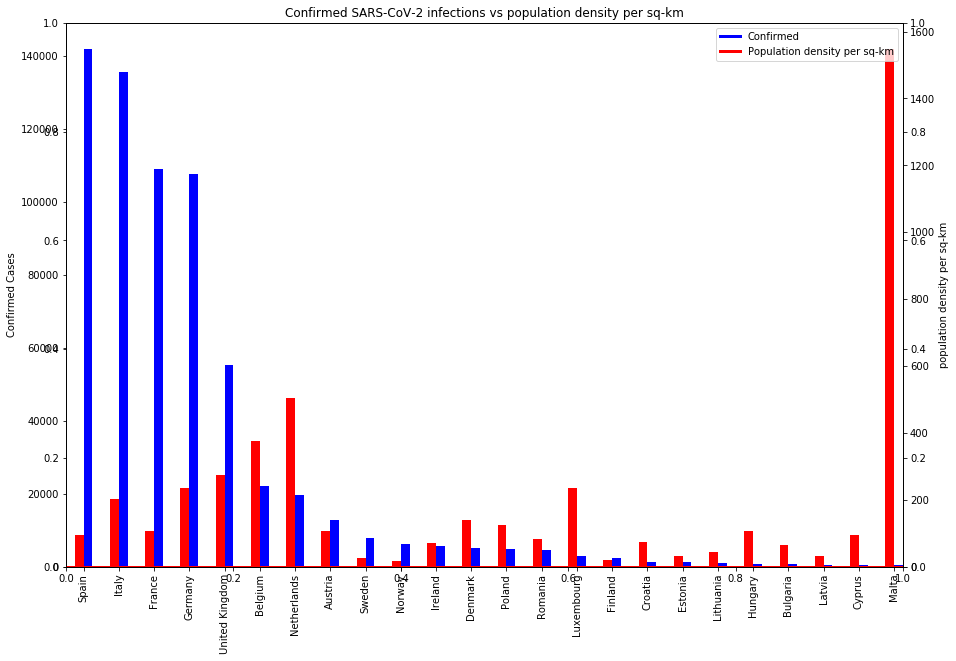

In [19]:
fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.25
df_Eurostat.Confirmed.plot(kind='bar', color='b', ax=ax, width=width, position=0)
df_Eurostat.population_density_2018.plot(kind='bar', color='r', ax=ax2, width=width, position=1)
plt.axhline(label = 'Confirmed', linewidth=3, color = 'b', );
plt.axhline(label = 'Population density per sq-km', linewidth=3, color = 'r', );
#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('Confirmed Cases')
ax2.set_ylabel('population density per sq-km')
#ax.tick_params(labelrotation=90)
ax.set_title('Confirmed SARS-CoV-2 infections vs population density per sq-km')
ax.set_frame_on(False)
plt.legend(loc="upper right");
plt.savefig("Confirmed SARS-CoV-2 infections vs population density per sq-km.png") # save as png

In [20]:
# From these graphs we cannot see an indication of correlation between confirmed SARS-CoV-2 infections and the
# population density per sq-km in the european countries. They seem to be rather unrelated at this point.

In [21]:
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_deaths_pneumod_chronicdrate.csv')
df_Eurostat=df_Eurostat.sort_values(by = "Deaths_p100kinh", axis=0, ascending=False)

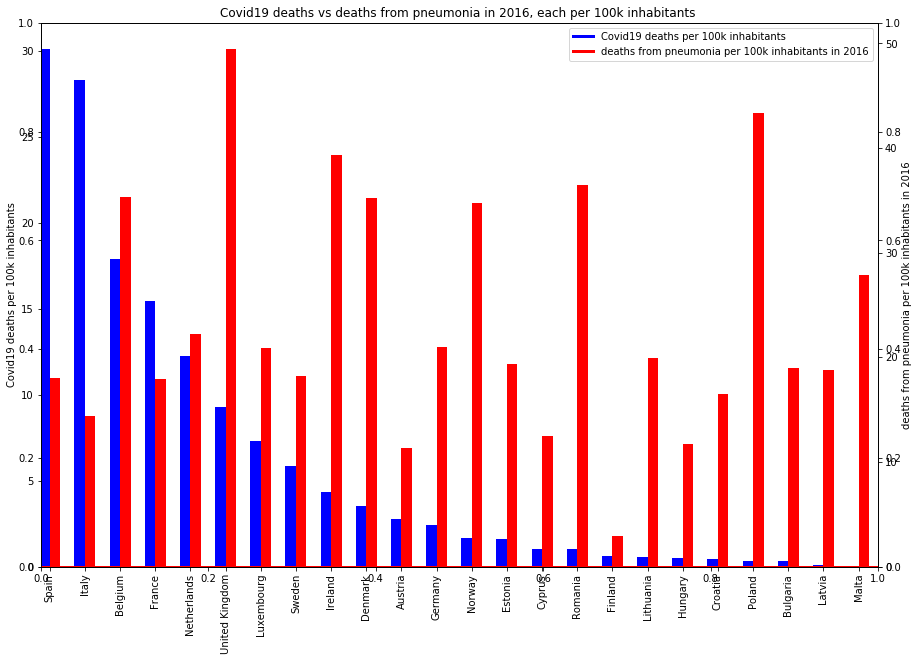

In [22]:
fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.3
df_Eurostat.Deaths_p100kinh.plot(kind='bar', color='b', ax=ax, width=width, position=1)
df_Eurostat.deaths_pneumo_2016.plot(kind='bar', color='r', ax=ax2, width=width, position=0)
#df_Eurostat.death_rate_chronic_diseases.plot(kind='bar', color='y', ax=ax2, width=width, position=1)
plt.axhline(label = 'Covid19 deaths per 100k inhabitants', linewidth=3, color = 'b', );
plt.axhline(label = 'deaths from pneumonia per 100k inhabitants in 2016', linewidth=3, color = 'r', );
#plt.axhline(label = 'death_rate_chronic_diseases', linewidth=3, color = 'y', );
#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('Covid19 deaths per 100k inhabitants')
ax2.set_ylabel('deaths from pneumonia per 100k inhabitants in 2016')
#ax.tick_params(labelrotation=90)
ax.set_title('Covid19 deaths vs deaths from pneumonia in 2016, each per 100k inhabitants ')
ax.set_frame_on(False)
plt.legend(loc="upper right");
plt.savefig("Covid19 deaths vs deaths from pneumonia in 2016 -each per 100k inhabitants.png") # save as png 

In [23]:
# From this we cannot see an indication of correlation between Covid19 deaths and the
# death rate from pneumonia in the european countries. They seem to be rather unrelated at this point.

In [24]:
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_deaths_pneumod_chronicdrate.csv')
df_Eurostat=df_Eurostat.sort_values(by = "Deaths_p100kinh", axis=0, ascending=False)

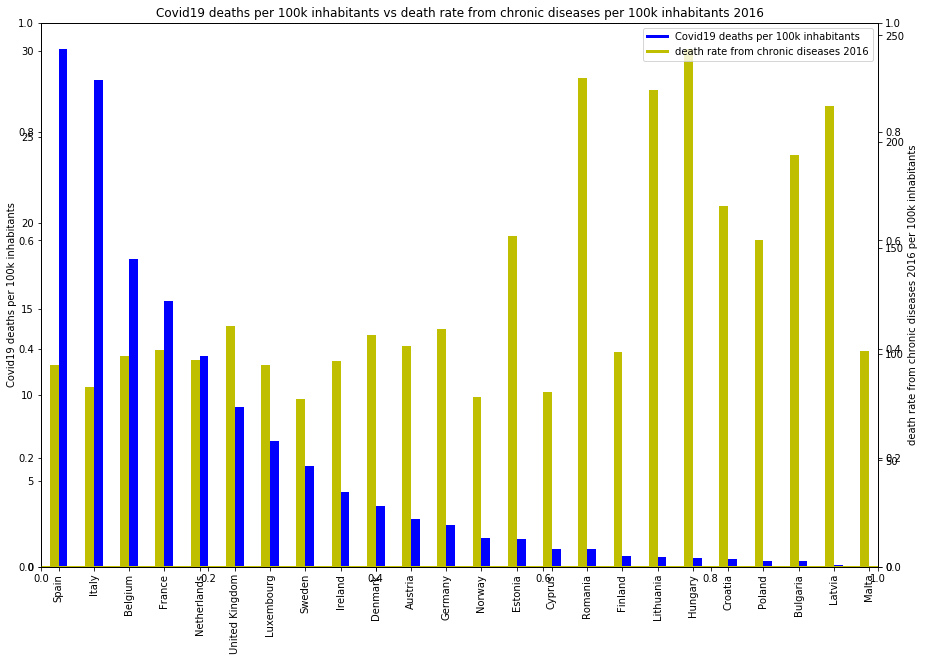

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.25
df_Eurostat.Deaths_p100kinh.plot(kind='bar', color='b', ax=ax, width=width, position=0)
#df_Eurostat.deaths_pneumo_2016.plot(kind='bar', color='y', ax=ax2, width=width, position=1)
df_Eurostat.death_rate_chronic_diseases.plot(kind='bar', color='y', ax=ax2, width=width, position=1)
plt.axhline(label = 'Covid19 deaths per 100k inhabitants', linewidth=3, color = 'b', );
#plt.axhline(label = 'deaths_pneumo_2016', linewidth=3, color = 'r', );
plt.axhline(label = 'death rate from chronic diseases 2016', linewidth=3, color = 'y', );
#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('Covid19 deaths per 100k inhabitants')
ax2.set_ylabel('death rate from chronic diseases 2016 per 100k inhabitants')
#ax.tick_params(labelrotation=90)
ax.set_title('Covid19 deaths per 100k inhabitants vs death rate from chronic diseases per 100k inhabitants 2016')
ax.set_frame_on(False)
plt.legend(loc="upper right");
plt.savefig("Covid19 deaths per 100k inhabitants vs death rate from chronic diseases 2016.png") # save as png 

In [26]:
# From these graphs we cannot see an indication of correlation between Covid19 deaths per 100.000 inhabitants and the
# death rate from chronic diseases in the european countries. They seem to be rather unrelated at this point.

In [27]:
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_deaths_conf_gdp_head_2018.csv')
df_Eurostat=df_Eurostat.sort_values(by = "Deaths_p100kinh", axis=0, ascending=False)

,Country,Confirmed,Deaths,Deaths_p100kinh,Confirmed_p100kinh,gdp_per_head_2018
7,Spain,141942,14045,30.1017,304.2150,24880.0
13,Italy,135586,17127,28.3166,224.1685,26740.0
1,Belgium,22194,2035,17.8531,194.7083,35600.0
9,France,109069,10328,15.4319,162.9691,32830.0
18,Netherlands,19580,2101,12.2286,113.9625,41540.0
23,United Kingdom,55242,6159,9.2933,83.3545,32700.0
15,Luxembourg,2970,44,7.3089,493.3514,83470.0
22,Sweden,7693,591,5.8398,76.0160,43810.0
12,Ireland,5709,210,4.3475,118.1892,57960.0
5,Denmark,5071,203,3.5114,87.7155,48260.0


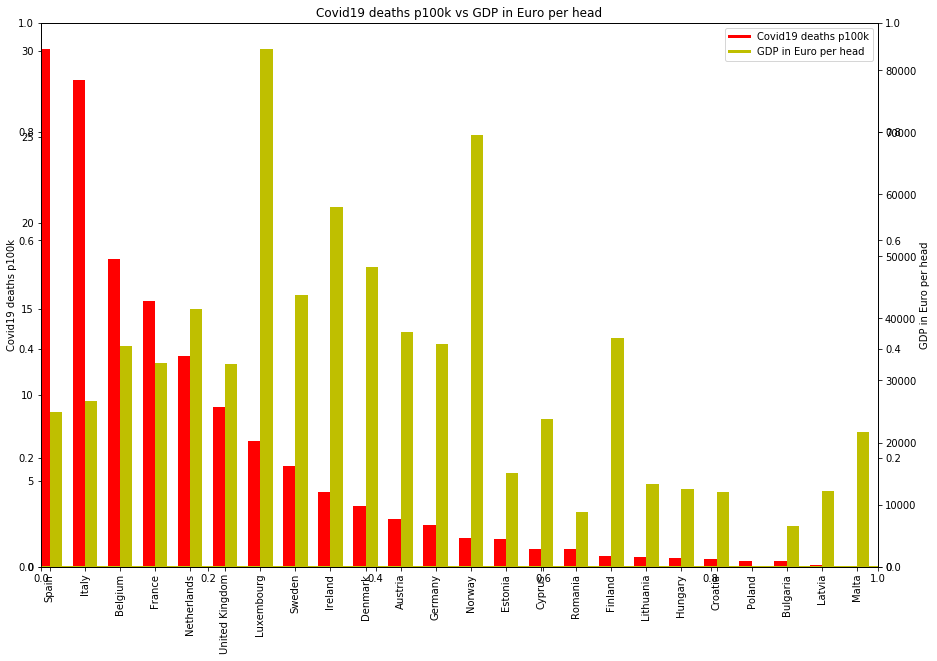

In [39]:
fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.35
df_Eurostat.Deaths_p100kinh.plot(kind='bar', color='r', ax=ax, width=width, position=1)
#df_Eurostat.Confirmed_p100kinh.plot(kind='bar', color='b', ax=ax2, width=width, position=1)
df_Eurostat.gdp_per_head_2018.plot(kind='bar', color='y', ax=ax2, width=width, position=0)
#plt.axhline(label = 'Confirmed cases p100k', linewidth=3, color = 'b', );
plt.axhline(label = 'Covid19 deaths p100k', linewidth=3, color = 'r', );
plt.axhline(label = 'GDP in Euro per head', linewidth=3, color = 'y', );
#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('Covid19 deaths p100k')
ax2.set_ylabel('GDP in Euro per head')
#ax.tick_params(labelrotation=90)
ax.set_title('Covid19 deaths p100k vs GDP in Euro per head')
ax.set_frame_on(False)
plt.legend(loc="upper right");
plt.savefig("Covid19 deaths p100k vs GDP in Euro per head.png") # save as png 

In [40]:
# From these graphs we can see an indication of correlation between Covid19 deaths per 100.000 inhabitants and 
# the lower-midrange GDP per Head numbers of those european countries with high death rates.
# None of the Top 5 GDP per Head countries are amongst the countries with the highest death rates from Covid19.
# Further investigation would be advisable.

In [46]:
df_Eurostat = pd.read_csv(r'Data/CSV-Files/From_MySQL_newcovid/newcovid_deaths_conf_gdp_head_2018.csv')
df_Eurostat=df_Eurostat.sort_values(by = "gdp_per_head_2018", axis=0, ascending=False)

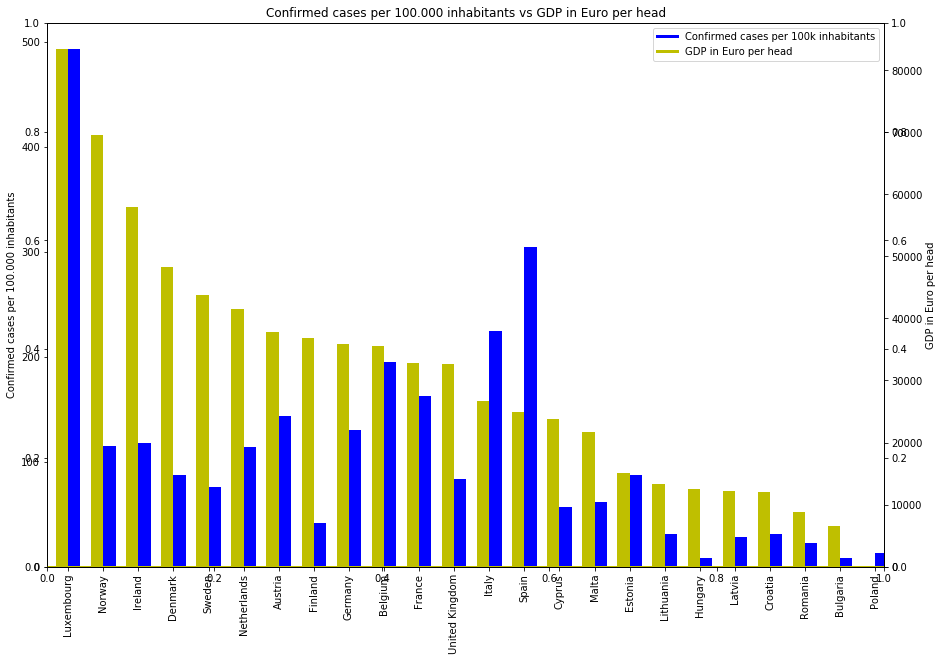

In [49]:
fig, ax = plt.subplots(figsize = (15,10))
#fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.35
#df_Eurostat.Deaths_p100kinh.plot(kind='bar', color='r', ax=ax, width=width, position=1)
df_Eurostat.Confirmed_p100kinh.plot(kind='bar', color='b', ax=ax, width=width, position=0)
df_Eurostat.gdp_per_head_2018.plot(kind='bar', color='y', ax=ax2, width=width, position=1)
plt.axhline(label = 'Confirmed cases per 100k inhabitants', linewidth=3, color = 'b', );
#plt.axhline(label = 'Covid19 deaths p100k', linewidth=3, color = 'r', );
plt.axhline(label = 'GDP in Euro per head', linewidth=3, color = 'y', );
#plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );
#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );
#plt.ylim(0,11)
ax.set_xticklabels(df_Eurostat.Country, rotation=90)
ax2.set_xticklabels(df_Eurostat.Country, rotation=90)
ax.set_ylabel('Confirmed cases per 100.000 inhabitants')
ax2.set_ylabel('GDP in Euro per head')
#ax.tick_params(labelrotation=90)
ax.set_title('Confirmed cases per 100.000 inhabitants vs GDP in Euro per head')
ax.set_frame_on(False)
plt.legend(loc="upper right");
plt.savefig("Confirmed cases p100k vs GDP in Euro per head.png") # save as png 

In [ ]:
# These graphs, with the exception of Luxembourg, indicate that higher GDP per Head correlate with lower Covid19 confirmed cases per 100.000 inhabitants and 
# that some of the countries with highest Covid19 confirmed cases per 100.000 inhabitants show lower GDP per head numbers. 
# The results are not unambiguous though.
# Further investigation would be advisable.